In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('Complaints.csv')

In [4]:
df.head()

,CASE_ID,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,...,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,RESOLUTION,RESOLUTION_DESCRIPTION,CASE_DESC,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,CAS-1060890-L3D6Q6,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,19.06.2022 06:07,DANA,21.06.2022 13:41,...,2.0,Actual Complaint,Phone,NaN,NaN,NaN,CBU / EBU - personal view,Technical,Internet,Technical complaint
1,CAS-388567-W4B9Q3,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,...,1.0,Not Actual Complaint,Phone,NaN,NaN,NaN,System Administrator,Commercial,Mobile,Commercial claim
2,CAS-1494939-L9F0X7,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
3,CAS-1059985-K3Y9F7,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,18.06.2022 20:38,MOATH,18.06.2022 20:38,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,NaN,Technical,Internet,Technical complaint
4,CAS-1239942-Y1S2F5,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,06.07.2022 01:22,IBRAHIM,06.07.2022 01:22,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint


In [5]:
#Find the percentage of missing values in each column in the dataset
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

CASE_ID                    0.000000
OFFER_NAME                12.414786
CUSTOMER_TYPE              0.000000
CUSTOMER_GROUP            12.942871
CURRENT_STATUS             0.000000
ESCALATION_FLAG            0.000000
ESCALATED_GROUP           67.738838
OPEN_DATE                  0.000000
OPEN_USER                  3.475756
CLOSE_DATE                 1.142583
CLOSE_GROUP               46.951512
CLOSE_USER                 4.954393
AGE_BRACKET                1.142583
ACTUAL_COMPLAINT           0.000000
CALLBACK_MECHANISM        69.870379
RESOLUTION                99.241479
RESOLUTION_DESCRIPTION    99.625540
CASE_DESC                 88.747000
OPEN_GR                   43.792607
COMPLAINT_TYPE             0.000000
PRODUCT                    0.000000
CASE                       0.000000
dtype: float64

In [6]:
# Drop RESOLUTION, RESOLUTION_DESCRIPTION and CASE_DESC because high percentage of missing values
df.drop(['RESOLUTION','RESOLUTION_DESCRIPTION','CASE_DESC'],axis=1,inplace=True)

**Open and close user**

In [7]:
#I assumed CLOSE_USER is the same as OPEN_USER
df['CLOSE_USER'] = df['CLOSE_USER'].fillna(df['OPEN_USER'])
#I filled in the rest with Unknown
df.fillna({'CLOSE_USER':'Unknown', 'OPEN_USER':'Unknown'}, inplace=True)

**Close date**

In [8]:
df = df.dropna(subset=['CLOSE_DATE'])

**ESCALATED_GROUP**

In [9]:
#Because it did not move to another department
df['ESCALATED_GROUP'] = df['ESCALATED_GROUP'].fillna('NO_GROUP')

**CALLBACK_MECHANISM**

In [10]:
df['CALLBACK_MECHANISM'].fillna(df['CALLBACK_MECHANISM'].mode()[0], inplace=True)

**Offer Name and Customer Group**

In [11]:
df[df['OFFER_NAME'].isnull()]

,CASE_ID,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,CLOSE_GROUP,CLOSE_USER,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
1,CAS-388567-W4B9Q3,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,Mobile_BO,ENNAS,1.0,Not Actual Complaint,Phone,System Administrator,Commercial,Mobile,Commercial claim
7,CAS-1402363-R0K4K0,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,25.07.2022 03:09,TCRMService,27.07.2022 17:58,ORANGE_MONEY_BO,IBRAHEEM,2.0,Actual Complaint,Phone,System Administrator,Commercial,Mobile,Commercial claim
10,CAS-592778-K0F2X3,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,27.04.2022 14:03,TCRMService,05.05.2022 16:03,Mobile_BO,TCRMService,8.0,Actual Complaint,Phone,System Administrator,Commercial,Mobile,Commercial claim
12,CAS-495398-Y7N3Q8,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,17.04.2022 18:32,TCRMService,19.04.2022 15:22,ORANGE_MONEY_BO,MOHAMMAD,1.0,Actual Complaint,Phone,System Administrator,Commercial,Mobile,Commercial claim
13,CAS-1452743-F5Q6W2,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,29.07.2022 20:37,TCRMService,01.08.2022 08:21,Mobile_BO,ENNAS,2.0,Actual Complaint,SMS,System Administrator,Technical,Mobile,Technical complaint
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10314,CAS-1436175-Y2Q8Q8,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,28.07.2022 04:37,TCRMService,29.07.2022 17:18,ORANGE_MONEY_BO,MOHAMMAD,1.0,Not Actual Complaint,Phone,System Administrator,Technical,Mobile,Technical complaint
10356,CAS-613457-J0J2R9,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,29.04.2022 22:21,TCRMService,03.05.2022 12:02,Mobile_BO,ENNAS,3.0,Actual Complaint,SMS,System Administrator,Technical,Mobile,Technical complaint
10363,CAS-585608-F3J7K1,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,26.04.2022 20:56,TCRMService,28.04.2022 11:01,Mobile_BO,ENNAS,1.0,Not Actual Complaint,Phone,System Administrator,Technical,Mobile,Technical complaint
10384,CAS-1484120-F0V7Y3,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,01.08.2022 20:16,TCRMService,02.08.2022 10:32,Mobile_BO,ENNAS,1.0,Actual Complaint,SMS,System Administrator,Technical,Mobile,Technical complaint


In [12]:
filtered_df = df[df['OPEN_USER'] == 'TCRMService']
counts = filtered_df[['OFFER_NAME','CUSTOMER_GROUP']].isnull().sum()
print(counts)


OFFER_NAME        1127
CUSTOMER_GROUP    1127
dtype: int64


In [13]:
df['OFFER_NAME'] = np.where(df['OPEN_USER'] == 'TCRMService', df['OFFER_NAME'].fillna('NO_OFFER_NAME'),df['OFFER_NAME'])
df['CUSTOMER_GROUP'] = np.where(df['OPEN_USER'] == 'TCRMService', df['CUSTOMER_GROUP'].fillna('NO_GROUP'),df['CUSTOMER_GROUP'])


In [14]:

# Input value to select rows
selected_Name_OFFER_NAME = 'FTTH Home'

# Filter the dataframe based on the selected Offer Name
filtered_df = df[df['OFFER_NAME'] == selected_Name_OFFER_NAME]
    
# Count the frequency of elements in the filtered dataframe
counts = filtered_df['CUSTOMER_GROUP'].value_counts()

# Print the most frequent Group
most_frequent_Group = counts.index[0]
print(f"The most frequent Group for {selected_Name_OFFER_NAME} is: {most_frequent_Group}")


The most frequent Group for FTTH Home is: FTTH Home


In [15]:
df['CUSTOMER_GROUP'] = np.where(df['OFFER_NAME'] == 'FTTH Home', df['CUSTOMER_GROUP'].fillna('FTTH Home'),df['CUSTOMER_GROUP'] )
df['OFFER_NAME'] = np.where(df['CUSTOMER_GROUP'] == 'FTTH Home', df['OFFER_NAME'].fillna('FTTH Home'),df['OFFER_NAME'] )

In [16]:
filtered_df1 = df[df['CUSTOMER_GROUP'] == 'Wanadoo-ADSL-Res']
counts = filtered_df1['OFFER_NAME'].value_counts()
most_frequent_Group = counts.index[0]
print(f"The most frequent Offer Name for {'Wanadoo-ADSL-Res'} is: {most_frequent_Group}")

The most frequent Offer Name for Wanadoo-ADSL-Res is: Bitstream Home


In [17]:
df['OFFER_NAME'] = np.where(df['CUSTOMER_GROUP'] == 'Wanadoo-ADSL-Res', df['OFFER_NAME'].fillna('Bitstream Home'),df['OFFER_NAME'] )

In [18]:
# When OFFER_NAME = Orange Gov 10 CC is CUSTOMER_GROUP = PM Governorate
df['CUSTOMER_GROUP'] = np.where(df['OFFER_NAME'] == 'Orange Gov 10 CC', df['CUSTOMER_GROUP'].fillna('PM Governorate'),df['CUSTOMER_GROUP'])
df['CUSTOMER_GROUP'] = df['CUSTOMER_GROUP'].fillna('Prepaid')

In [19]:
df = df.dropna(subset=['OFFER_NAME'])

**Open and cloce Group**

In [20]:
# Get a list of unique elements in the OPEN_GR column
open_gr_elements = df['OPEN_GR'].unique()

# Loop through each element in open_gr_elements
for selected in open_gr_elements:

  # Filter the dataframe based on the selected Offer Name
  filtered_df = df[df['OPEN_GR'] == selected]

  # Count the frequency of elements in the filtered dataframe
  close_group_counts = filtered_df['CLOSE_GROUP'].value_counts()
  
  # Check if close_group_counts is not empty
  if close_group_counts.empty:
    print(f"No data available for {selected}")
  else:
    # Get the most frequent Close Group
    most_frequent_close_group = close_group_counts.index[0]
    
    # Fill in the missing values in CLOSE_GROUP for the current OPEN_GR with the most frequent Close Group
    df.loc[(df['OPEN_GR'] == selected) & (df['CLOSE_GROUP'].isna()), 'CLOSE_GROUP'] = most_frequent_close_group

# Get a list of unique elements in the CLOSE_GROUP column
close_group_elements = df['CLOSE_GROUP'].unique()

# Loop through each element in close_group_elements
for selected in close_group_elements:

  # Filter the dataframe based on the selected Close Group
  filtered_df = df[df['CLOSE_GROUP'] == selected]

  # Count the frequency of elements in the filtered dataframe
  open_gr_counts = filtered_df['OPEN_GR'].value_counts()
  
  # Check if open_gr_counts is not empty
  if open_gr_counts.empty:
    print(f"No data available for {selected}")
  else:
    # Get the most frequent Open GR
    most_frequent_open_gr = open_gr_counts.index[0]
    
    # Fill in the missing values in OPEN_GR for the current CLOSE_GROUP with the most frequent Open GR
    df.loc[(df['CLOSE_GROUP'] == selected) & (df['OPEN_GR'].isna()), 'OPEN_GR'] = most_frequent_open_gr


No data available for nan
No data available for Privileged CSR
No data available for nan


In [21]:
df['CLOSE_GROUP'] = df['CLOSE_GROUP'].fillna('NO_CLOSE_GROUP')
df['OPEN_GR'] = df['OPEN_GR'].fillna('NO_OPEN_GR')

In [22]:
df.isnull().sum()

CASE_ID               0
OFFER_NAME            0
CUSTOMER_TYPE         0
CUSTOMER_GROUP        0
CURRENT_STATUS        0
ESCALATION_FLAG       0
ESCALATED_GROUP       0
OPEN_DATE             0
OPEN_USER             0
CLOSE_DATE            0
CLOSE_GROUP           0
CLOSE_USER            0
AGE_BRACKET           0
ACTUAL_COMPLAINT      0
CALLBACK_MECHANISM    0
OPEN_GR               0
COMPLAINT_TYPE        0
PRODUCT               0
CASE                  0
dtype: int64

**ML modeling**

**Data split**

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [24]:
cat_columns = df.select_dtypes(['object']).columns

label_encoder = LabelEncoder()
df[cat_columns] = df[cat_columns].apply(LabelEncoder().fit_transform)

# storing the input values in the X variable
X = df.drop(["COMPLAINT_TYPE"], axis=1)

# storing all the ouputs in y variable
y = df["COMPLAINT_TYPE"]

**Training By KNN**

In [25]:
report = pd.DataFrame(index=["accuracy_score","precision_score","recall_score","f1_score"],columns=["KNN","DT","NB"])

In [26]:
#Build the KNN model and perform training.
classifer = KNeighborsClassifier(n_neighbors=3 )

In [27]:
KNN_sum_acc = 0
KNN_sum_pre = 0
KNN_sum_rec = 0
KNN_sum_f1 = 0

for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  # Performing training
  classifer.fit(X_train,y_train)
  #Calculate predictions (y_pred) using X_test
  y_pred= classifer.predict(X_test)
  # Display evaluation report
  KNN_accuracy = accuracy_score(y_test,y_pred)
  KNN_sum_acc = KNN_sum_acc + KNN_accuracy
  KNN_precision = precision_score(y_test,y_pred)
  KNN_sum_pre = KNN_sum_pre + KNN_precision
  KNN_recall = recall_score(y_test,y_pred)
  KNN_sum_rec = KNN_sum_rec + KNN_recall
  KNN_F1_score = f1_score(y_test,y_pred)
  KNN_sum_f1 = KNN_sum_f1 + KNN_F1_score
print('==============================================')
print('Average Accuracy:', KNN_sum_acc/10)
print('Average Precision:', KNN_sum_pre/10)
print('Average Recall:', KNN_sum_rec/10)
print('Average F1-Score:', KNN_sum_f1/10)
report['KNN'] = [KNN_sum_acc/10, KNN_sum_pre/10, KNN_sum_rec/10, KNN_sum_f1/10]

Average Accuracy: 0.7824245374878285
Average Precision: 0.8201825347701541
Average Recall: 0.9183016624667071
Average F1-Score: 0.8664109331121953


**Train by Decision Tree**

In [28]:
DT_sum_acc = 0
DT_sum_pre = 0
DT_sum_rec = 0
DT_sum_f1 = 0
# Create Decision Tree classifer object
classifer2 = DecisionTreeClassifier()
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  # Train Decision Tree Classifer
  classifer2 = classifer2.fit(X_train,y_train)
  #Predict the response for test dataset
  y_pred = classifer2.predict(X_test)
  DT_accuracy = accuracy_score(y_test,y_pred)
  DT_sum_acc = DT_sum_acc + DT_accuracy
  DT_precision = precision_score(y_test,y_pred)
  DT_sum_pre = DT_sum_pre + DT_precision
  DT_recall = recall_score(y_test,y_pred)
  DT_sum_rec = DT_sum_rec + DT_recall
  DT_F1_score = f1_score(y_test,y_pred)
  DT_sum_f1 = DT_sum_f1 + DT_F1_score

print('==============================================')
print('Average Accuracy:', DT_sum_acc/10)
print('Average Precision:', DT_sum_pre/10)
print('Average Recall:', DT_sum_rec/10)
print('Average F1-Score:', DT_sum_f1/10)
report['DT'] = [DT_sum_acc/10, DT_sum_pre/10, DT_sum_rec/10, DT_sum_f1/10]


Average Accuracy: 0.994888023369036
Average Precision: 0.9961639049279409
Average Recall: 0.9972304447320706
Average F1-Score: 0.9966958869688666


**Train by Gaussian Naive Bayes**

In [29]:
NB_sum_acc = 0
NB_sum_pre = 0
NB_sum_rec = 0
NB_sum_f1 = 0
# Create Gaussian Naive Bayes classifer object
classifer3 = GaussianNB()
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  # Train Decision Tree Classifer
  classifer3 = classifer3.fit(X_train,y_train)
  #Predict the response for test dataset
  y_pred = classifer3.predict(X_test)
  NB_accuracy = accuracy_score(y_test,y_pred)
  NB_sum_acc = NB_sum_acc + NB_accuracy
  NB_precision = precision_score(y_test,y_pred)
  NB_sum_pre = NB_sum_pre + NB_precision
  NB_recall = recall_score(y_test,y_pred)
  NB_sum_rec = NB_sum_rec + NB_recall
  NB_F1_score = f1_score(y_test,y_pred)
  NB_sum_f1 = NB_sum_f1 + NB_F1_score

print('==============================================')
print('Average Accuracy:', NB_sum_acc/10)
print('Average Precision:', NB_sum_pre/10)
print('Average Recall:', NB_sum_rec/10)
print('Average F1-Score:', NB_sum_f1/10)
report['NB'] = [NB_sum_acc/10, NB_sum_pre/10, NB_sum_rec/10, NB_sum_f1/10]

Average Accuracy: 0.979308666017527
Average Precision: 0.993615561656217
Average Recall: 0.9795601547923308
Average F1-Score: 0.9865336930835351


In [30]:
report.round(3)

,KNN,DT,NB
accuracy_score,0.782,0.995,0.979
precision_score,0.820,0.996,0.994
recall_score,0.918,0.997,0.980
f1_score,0.866,0.997,0.987


**Data Visualization**

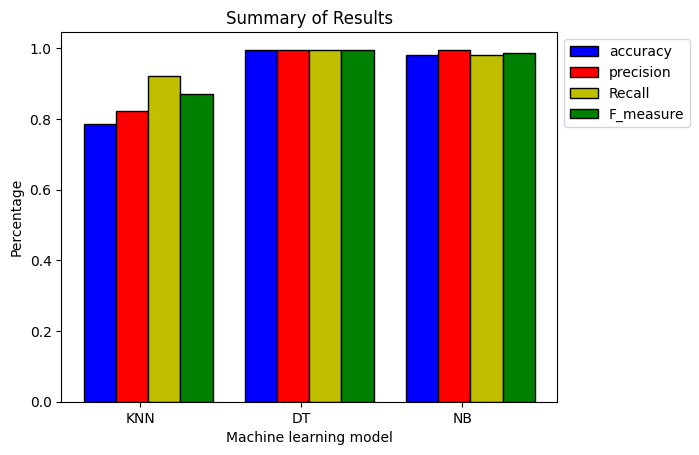

In [31]:
import matplotlib.pyplot as plt

# data for the bar chart
ML_model_name = ['KNN','DT','NB']
ML_model_accuracy = [KNN_accuracy,DT_accuracy,NB_accuracy]
ML_model_precision = [KNN_precision,DT_precision,NB_precision]
ML_model_Recall = [KNN_recall,DT_recall,NB_recall]
ML_model_F_measure = [KNN_F1_score,DT_F1_score,NB_F1_score]

# create the bar chart
barWidth = 0.2

r1 = np.arange(len(ML_model_accuracy))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1,ML_model_accuracy, color='b', width=barWidth, label='accuracy',edgecolor = 'black')
plt.bar(r2,ML_model_precision, color='r', width=barWidth, label='precision',edgecolor = 'black')
plt.bar(r3,ML_model_Recall, color='y', width=barWidth, label='Recall',edgecolor = 'black')
plt.bar(r4,ML_model_F_measure, color='g', width=barWidth, label='F_measure',edgecolor = 'black')

# add labels and title
plt.xlabel("Machine learning model")
plt.ylabel("Percentage")
plt.title("Summary of Results")
plt.xticks(r1+0.25, ML_model_name )


# add a legend
plt.legend(bbox_to_anchor=(1, 1))

# display the chart
plt.show()


**Radar Chart**

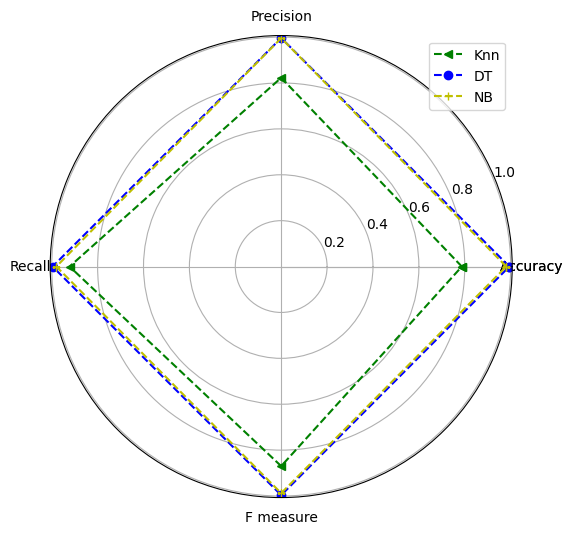

In [32]:
subjects=['Accuracy','Precision','Recall','F measure']
knn=[KNN_accuracy,KNN_precision,KNN_recall,KNN_F1_score]
DT=[DT_accuracy,DT_precision,DT_recall,DT_F1_score]
NB=[NB_accuracy,NB_precision,NB_recall,NB_F1_score]

angles=np.linspace(0,2*np.pi,len(subjects), endpoint=False)

#add the first angle at the end of the array to completely describe the circle.
angles=np.concatenate((angles,[angles[0]]))

subjects.append(subjects[0])
knn.append(knn[0])
DT.append(DT[0])
NB.append(NB[0])

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)

plt.subplot(polar=True)
plt.plot(angles,knn , '<--',color='g',label='Knn')
plt.plot(angles,DT ,'o--',color='b',label='DT')
plt.plot(angles,NB, '+--',color='y',label='NB')
# ax.fill(angles, knn, alpha=0.25, color='g')
# ax.fill(angles, DT, alpha=0.25, color='b')
# ax.fill(angles, NB, alpha=0.25, color='y')

ax.set_thetagrids(angles * 180/np.pi, subjects)
plt.grid(True)
plt.legend()
plt.show()